# Imports

In [75]:
import matplotlib.pyplot as plt
import numpy as np

In [76]:
material = "steel"

In [77]:
def printMeaningful(value, sigma=0.0):
    tennage = 0
    if sigma == 0:
        sigma = value
    while sigma < 1:
        tennage -= 1
        sigma *= 10
        value *= 10
    while sigma > 10:
        tennage += 1
        sigma /= 10
        value /= 10
    return "({:.1f} \\pm {:.1f}) \\cdot 10^{}{}{}".format(value, sigma, "{", tennage, "}")

In [78]:
printMeaningful(0.2)

'(2.0 \\pm 2.0) \\cdot 10^{-1}'

# Inputs

## frequency

### Inputs

In [79]:
N = []
f = []

with open(f"frequencies/{material}", "r") as file:
    print(file.readline())
    instrum_f = float(file.readline().strip())
    print(file.readline())
    for line in file:
        temp = line.strip().split()
        N.append(int(temp[0]))
        f.append(float(temp[1]))
    N = np.array(N)
    f = np.array(f)

instrum_f, ÐºÐ“Ñ†

n	fÐ¸Ð·Ð¼, ÐºÐ“Ñ†



In [80]:
N

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [81]:
f

array([ 4.1243,  8.2557, 12.3795, 16.5077, 20.628 , 24.7507, 28.8517,
       32.963 , 37.0553])

### Table

In [82]:
for i in range(len(N)):
    print("\t\t\hline\n\t\t", end = "")
    print("{}&{}\\\\".format(N[i], f[i]))

		\hline
		1&4.1243\\
		\hline
		2&8.2557\\
		\hline
		3&12.3795\\
		\hline
		4&16.5077\\
		\hline
		5&20.628\\
		\hline
		6&24.7507\\
		\hline
		7&28.8517\\
		\hline
		8&32.963\\
		\hline
		9&37.0553\\


### Units

In [83]:
f *= 1000 # kHz -> Hz
instrum_f *= 1000 # kHz -> Hz

In [84]:
f, instrum_f

(array([ 4124.3,  8255.7, 12379.5, 16507.7, 20628. , 24750.7, 28851.7,
        32963. , 37055.3]),
 0.1)

## Sample

### Input

In [85]:
d = []
with open(f"samples/{material}", "r") as file:
    print(file.readline())
    L, sigma_L = (float(i) for i in file.readline().strip().split())
    print(file.readline())
    m, sigma_m = (float(i) for i in file.readline().strip().split())
    print(file.readline())
    instrum_d = (float(file.readline().strip()))
    print(file.readline())
    for line in file:
        d.append(float(line.strip()))
    d = np.array(d)

L sigma_L

m sigma_m

sigma_d

d



In [86]:
d

array([12.03, 12.02, 12.11, 12.24, 12.26])

### Table

### Units

In [87]:
d /= 1000 # mm -> m 
instrum_d /= 1000 # mm -> m 
L /= 1000 # mm -> m 
sigma_L /= 1000 # mm -> m
m /= 1000 # g -> kg
sigma_m /= 1000 # g -> kg


In [88]:
printMeaningful(m, sigma_m)

'(312.3 \\pm 1.0) \\cdot 10^{-4}'

## Bar

### Input

### Table

### Units

# Speed of sound

Permutations

$y = f\\$
$x = n\\$
$y = kx + b\\$

In [89]:
y = f
x = N

mean_xy = np.mean(x * y)
mean_x = np.mean(x)
mean_x2 = np.mean(x**2)
mean_y = np.mean(y)
mean_y2 = np.mean(y**2)

In [90]:
k = (mean_xy - mean_x*mean_y)/(mean_x2 - mean_x**2)
k

4117.221666666671

In [91]:
b = mean_y - k * mean_x
b

26.769444444416877

$k = \frac{2\pi N}{tm}$

graphics

In [92]:
# xykb = {"copper": None, "steel": None, "dura": None}

In [93]:
if material in xykb:
  xykb[material] = (x, y, k, b)

In [94]:
xykb

{'copper': (array([1, 2, 3, 4, 5, 6]),
  array([ 3158.8,  6314.6,  9485.3, 12649.7, 15804.4, 18971.1]),
  3162.722857142859,
  -5.546666666674355),
 'steel': (array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
  array([ 4124.3,  8255.7, 12379.5, 16507.7, 20628. , 24750.7, 28851.7,
         32963. , 37055.3]),
  4117.221666666671,
  26.769444444416877),
 'dura': (array([1, 2, 3, 4, 5, 6, 7, 8]),
  array([ 4253.4,  8514.1, 12759.3, 17025.9, 21262.5, 25515.5, 29745.8,
         33976. ]),
  4246.689285714285,
  21.460714285720314)}

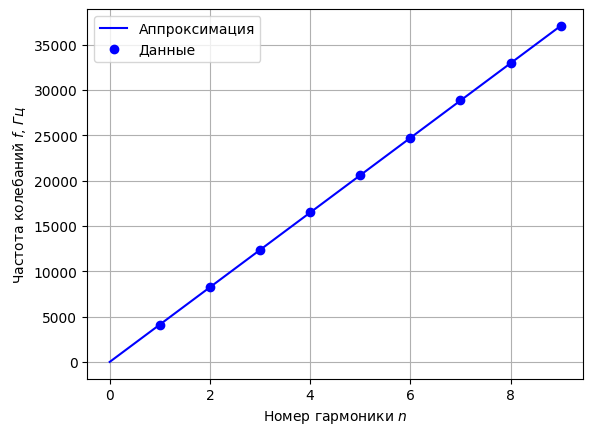

In [95]:
plt.plot((0, 9), (0, k*9 + b), "b")
plt.plot(x, y, "bo")
plt.legend(["Аппроксимация", "Данные"])
plt.xlabel("Номер гармоники $%s$"%("n"))
plt.ylabel("Частота колебаний $%s$, $%s$"%("f", "Гц"))
plt.grid()

C:\Users\egorm\AppData\Local\Temp\ipykernel_17908\2245915946.py:10: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x00000196257FE290> starts with '_'. It is thus excluded from the legend.
  plt.legend(["Дюрасталь", "_", "Данные"])


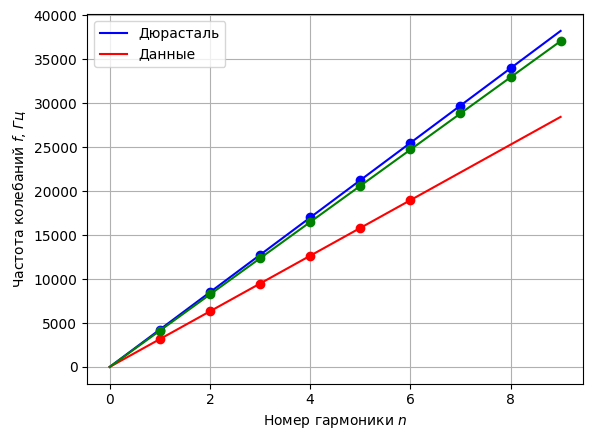

In [100]:
x, y, k, b = xykb["dura"]
plt.plot((0, 9), (0, k*9 + b), "b")
plt.plot(x, y, "bo")
x, y, k, b = xykb["copper"]
plt.plot((0, 9), (0, k*9 + b), "r")
plt.plot(x, y, "ro")
x, y, k, b = xykb["steel"]
plt.plot((0, 9), (0, k*9 + b), "g")
plt.plot(x, y, "go")
plt.legend(["Дюрасталь", "_", "Данные"])
plt.xlabel("Номер гармоники $%s$"%("n"))
plt.ylabel("Частота колебаний $%s$, $%s$"%("f", "Гц"))
plt.grid()